# Movie Recommender System

In [1]:
import pandas as pd

ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.merge(movies,ratings)
ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [2]:
ratings = ratings.drop(['genres','timestamp'],axis=1)
ratings.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [3]:
user_ratings = ratings.pivot_table(index=['userId'],columns=['title'],values='rating')
user_ratings.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print('Rata-rata rating dari tiap judul film')
print(ratings.groupby('title')['rating'].mean().head(10))
print('-----------------------------------------------------------')
print('Mengurutkan rata-rata rating dari tiap judul film')
print(ratings.groupby('title')['rating'].mean().sort_values(ascending=False).head(10))

Rata-rata rating dari tiap judul film
title
'71 (2014)                                 4.000000
'Hellboy': The Seeds of Creation (2004)    4.000000
'Round Midnight (1986)                     3.500000
'Salem's Lot (2004)                        5.000000
'Til There Was You (1997)                  4.000000
'Tis the Season for Love (2015)            1.500000
'burbs, The (1989)                         3.176471
'night Mother (1986)                       3.000000
(500) Days of Summer (2009)                3.666667
*batteries not included (1987)             3.285714
Name: rating, dtype: float64
-----------------------------------------------------------
Mengurutkan rata-rata rating dari tiap judul film
title
Gena the Crocodile (1969)                    5.0
True Stories (1986)                          5.0
Cosmic Scrat-tastrophe (2015)                5.0
Love and Pigeons (1985)                      5.0
Red Sorghum (Hong gao liang) (1987)          5.0
Thin Line Between Love and Hate, A (1996)    5

In [5]:
print('Jumlah rating tiap film')
ratings.groupby('title')['rating'].count().sort_values(ascending=False).head()

Jumlah rating tiap film


title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [6]:
# Dataframe jumlah rata-rata rating tiap film
ratings_mean_count = pd.DataFrame(ratings.groupby('title')['rating'].mean())
ratings_mean_count.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [7]:
# Menambahkan kolom jumlah rating
ratings_mean_count['rating_counts'] = pd.DataFrame(ratings.groupby('title')['rating'].count())
ratings_mean_count.head(10)

,rating,rating_counts
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

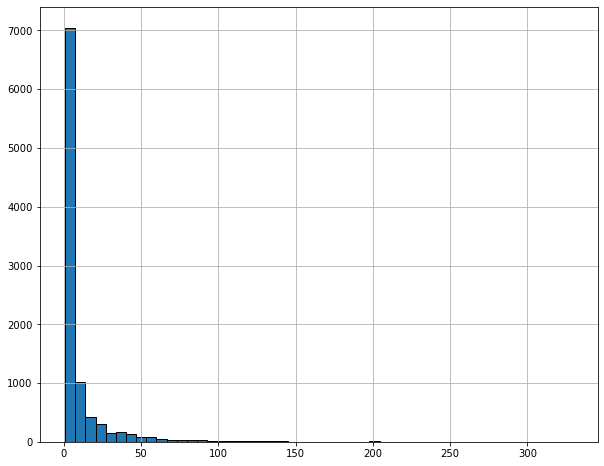

In [9]:
# Melihat sebaran banyaknya orang yang memberikan rating pada movie
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<AxesSubplot:>

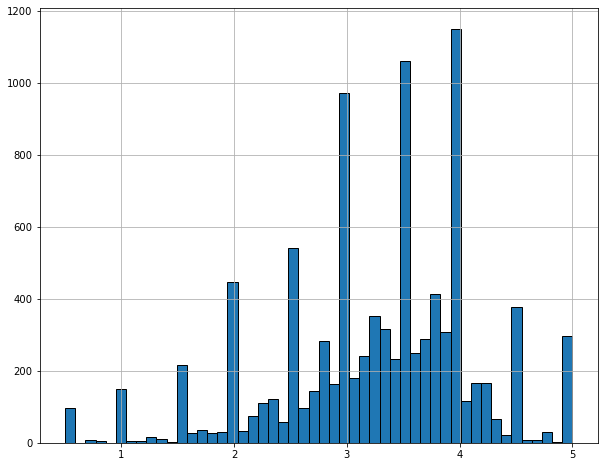

In [10]:
# Melihat persebaran rating pada movie
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 720x576 with 0 Axes>

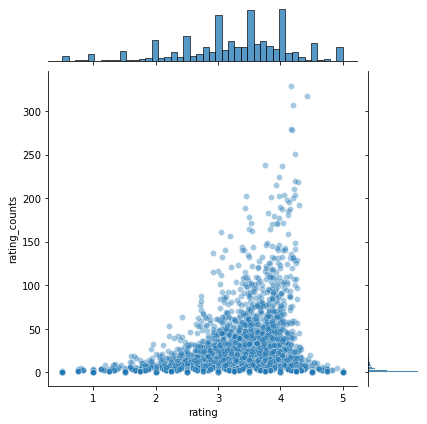

In [11]:
#Melihat persebaran rating count dan rating
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

In [12]:
print("Before: ",user_ratings.shape)
user_ratings = user_ratings.dropna(thresh=10, axis=1).fillna(0,axis=1)
print("After: ",user_ratings.shape)

Before:  (610, 9719)
After:  (610, 2269)


In [13]:
corr_matrix = user_ratings.corr(method='pearson')
corr_matrix.head(20)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518
101 Dalmatians (1996),0.087931,0.148903,0.006139,0.223481,0.234459,1.000000,0.285112,0.119843,0.072399,0.029967,...,0.114968,0.077232,0.096294,0.067134,0.113224,0.184324,0.054024,0.047804,0.156932,0.078734
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.224052,0.142141,-0.016835,0.211473,0.119132,0.285112,1.000000,0.134037,0.017264,-0.046277,...,0.120302,0.125816,0.049818,0.083650,0.171654,0.274260,0.077594,0.085606,0.248820,0.171118
12 Angry Men (1957),0.034223,0.159756,0.031704,0.011784,0.059187,0.119843,0.134037,1.000000,0.132979,0.058862,...,0.104518,0.028415,0.079905,0.241435,0.144652,0.122107,0.056742,-0.001708,0.074306,0.102744
12 Years a Slave (2013),0.009277,0.135486,-0.024275,0.091964,-0.025882,0.072399,0.017264,0.132979,1.000000,0.249931,...,0.024045,0.038127,0.013786,0.190366,0.104150,0.017351,0.063325,0.002528,0.037469,0.004213


In [14]:
def get_similar(movie_name,rating):
    similar_ratings = corr_matrix[movie_name]*(rating-2.5)
    similar_ratings = similar_ratings.sort_values(ascending=False)
    
    return similar_ratings

In [15]:
romantic_fan = [('2 Fast 2 Furious (Fast and the Furious 2, The) (2003)',3),("12 Years a Slave (2013)", 4),("Toy Story 3 (2010)", 5),("Dances with Wolves (1990)",1)]
similar_movies = pd.DataFrame()
for movie,rating in romantic_fan:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_12444\820230986.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12444\820230986.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12444\820230986.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12444\820230986.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

title,"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",xXx (2002),30 Days of Night (2007),Snakes on a Plane (2006),Die Another Day (2002),"Fast and the Furious, The (2001)",Kung Fu Hustle (Gong fu) (2004),S.W.A.T. (2003),Wanted (2008),Rat Race (2001),...,Arsenic and Old Lace (1944),"Philadelphia Story, The (1940)",Hoop Dreams (1994),"Madness of King George, The (1994)",Like Water for Chocolate (Como agua para chocolate) (1992),"English Patient, The (1996)","Postman, The (Postino, Il) (1994)","Piano, The (1993)",Crimson Tide (1995),Clear and Present Danger (1994)
0,0.500000,0.268418,0.257922,0.256858,0.256064,0.249833,0.245947,0.242930,0.242256,0.241992,...,-0.018586,-0.018799,-0.018813,-0.018958,-0.019730,-0.019885,-0.021172,-0.024623,-0.026242,-0.029932
1,0.064218,0.056204,0.052268,-0.014553,0.162271,0.275179,0.014409,0.078675,0.179954,0.120895,...,-0.052629,0.091208,0.000730,-0.053682,-0.055868,0.023385,-0.059952,-0.077455,-0.027745,-0.079736
2,0.545303,0.811175,0.574300,0.651663,0.774412,0.524858,0.440436,0.665743,0.699069,0.686308,...,-0.095368,0.012606,-0.048352,-0.171219,-0.122696,-0.176633,-0.191219,-0.203826,-0.100106,-0.179728
3,-0.034535,-0.092410,-0.114351,-0.123160,-0.120397,-0.131665,-0.045181,-0.128090,-0.021324,-0.025134,...,-0.114135,-0.065803,-0.264390,-0.197859,-0.202065,-0.207368,-0.079898,-0.398638,-0.709502,-0.756826


In [16]:
similar_movies.sum().sort_values(ascending=False).head(10)

title
Toy Story 3 (2010)                  2.971116
12 Years a Slave (2013)             2.105840
Inside Out (2015)                   1.881485
Up (2009)                           1.816906
Sherlock Holmes (2009)              1.804802
Avengers, The (2012)                1.737107
Grand Budapest Hotel, The (2014)    1.692803
Dark Knight Rises, The (2012)       1.686196
X-Men: First Class (2011)           1.675941
Django Unchained (2012)             1.672034
dtype: float64

In [17]:
action_fan = [("Thor (2011)", 4),("The Hunger Games: Mockingjay - Part 1 (2014)",5),("Captain America: The First Avenger (2011)",5),("12 Years a Slave (2013)", 1)]
similar_movies = pd.DataFrame()
for movie,rating in action_fan:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_12444\1593218587.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12444\1593218587.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12444\1593218587.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12444\1593218587.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pan

title,Thor (2011),Captain America: The First Avenger (2011),Thor: The Dark World (2013),Avengers: Age of Ultron (2015),"Incredible Hulk, The (2008)",X-Men: First Class (2011),X-Men: Days of Future Past (2014),"Avengers, The (2012)",Guardians of the Galaxy (2014),Iron Man 2 (2010),...,Nine Months (1995),"English Patient, The (1996)","Remains of the Day, The (1993)","Grifters, The (1990)",Arsenic and Old Lace (1944),"Madness of King George, The (1994)",Like Water for Chocolate (Como agua para chocolate) (1992),"Piano, The (1993)","Postman, The (Postino, Il) (1994)",Disclosure (1994)
0,1.500000,1.101214,0.977423,0.935850,0.925654,0.899076,0.895706,0.879269,0.849129,0.841406,...,-0.066415,-0.067068,-0.069026,-0.073338,-0.076959,-0.078499,-0.081695,-0.085158,-0.087668,-0.087842
1,1.165786,1.154829,1.189121,0.921747,0.846109,1.169510,1.169847,0.927851,1.177153,1.003722,...,-0.132819,-0.133134,-0.095139,-0.101082,-0.106073,-0.108195,-0.112601,-0.156110,-0.120833,-0.145250
2,1.835357,2.500000,1.637575,1.698193,1.321939,1.573299,1.580217,1.469976,1.474799,1.436907,...,-0.129175,-0.058702,-0.112632,-0.119668,-0.125576,-0.128089,-0.083705,-0.184814,-0.143051,-0.136798
3,-0.161780,-0.203450,-0.344597,-0.146090,-0.110669,-0.247843,-0.147144,-0.335005,-0.204640,-0.188133,...,0.039045,-0.023385,0.047204,-0.046729,0.052629,0.053682,0.055868,0.077455,0.059952,0.072067


In [18]:
similar_movies.sum().sort_values(ascending=False).head(10)

title
Captain America: The First Avenger (2011)       4.552593
Thor (2011)                                     4.339364
The Hunger Games: Mockingjay - Part 1 (2014)    4.161247
X-Men: Days of Future Past (2014)               3.498626
Thor: The Dark World (2013)                     3.459523
Avengers: Age of Ultron (2015)                  3.409701
X-Men: First Class (2011)                       3.394041
Star Trek Into Darkness (2013)                  3.377997
Guardians of the Galaxy (2014)                  3.296442
Amazing Spider-Man, The (2012)                  3.281433
dtype: float64